In [2]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

import numpy as np
import matplotlib.pyplot as plt


In [3]:
size = 1000

intercept = 10

test1 = intercept*np.ones(size) + np.random.random(size)
test2 = np.arange(0, size) + np.random.random(size)
test3 = np.random.random(size)**2

In [4]:
def stationary_test(observations, threshold=0.1, significance=0.01):
    """function to test stationarity of observed data"""
    stable = True

    size = len(observations)
    slope = np.arange(size)

    data_to_test = observations + slope

    values = np.vstack((np.arange(size), np.ones(size))).T
    model = sm.OLS(data_to_test, values).fit()

    observed_slope = model.params[0]
    p_slope = model.summary2().tables[1]['P>|t|']["x1"]

    if (observed_slope < 1 + threshold) and (p_slope < significance):
        return stable
    else:
        return not stable

    

In [5]:
model = sm.OLS(test2, np.vstack((np.arange(size), np.ones(size))).T).fit()

In [6]:
model.summary2().tables[1]['P>|t|']["x1"]

0.0

In [7]:
stationary_test(np.random.random(100), threshold=0.01)

True

- si es estacionario: pendiente va a ser cercana a 0 y estidisticamente significative
- sumas una pendiente que sabemos cual es
- y si es estacionario, cuando hagas una regresion lineal tendrias que obtener la pendiente esperada

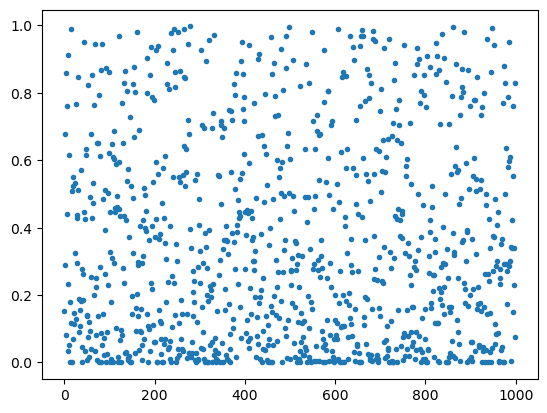

In [15]:
plt.plot(test3, ".")

In [9]:
def stationary_test_adf(observations):
    """
    function to test stationarity using an
    augmented Dickey-Fuller test with a 1% significance
    """
    stationarity = True

    results = adfuller(observations)

    adf = results[0]
    p_value = results[1]
    critical_value_001 = results[4]["1%"]

    if (adf < critical_value_001) and (p_value < 0.01):
        return stationarity
    else:
        return not stationarity


In [10]:
stationary_test_adf(test3)

True

In [19]:
result = adfuller(test3)
result

(-32.41234055400636,
 0.0,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 426.64952092888666)

In [24]:
adf = result[0]
p_value = result[1]
critical_value_001 = result[4]["1%"]

In [25]:
critical_value_001

-3.4370403176323214